$\Large\textbf{Lab 5.} \large\textbf{Exercise 1.}$



Recall that to solve problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$, the update rule involved in Newton's method is of the form: 
\begin{align}
\mathbf{x}^{k+1} = \mathbf{x}^{k} - \eta^k (\nabla^2 f(\mathbf{x}^{k}))^{-1} \nabla f(\mathbf{x}^{k}).   
\end{align}

Now we will discuss a method which avoids explicit computation of the inverse of Hessian matrix at each iteration, but is nearly efficient as the Newton's method. This method will be called BFGS named after the famous applied Mathematicians Broyden, Fletcher, Goldfarb and Shanno. 

The main idea of BFGS method is to replace the inverse of Hessian matrix $(\nabla^2 f(\mathbf{x}^{k}))^{-1}$ in the update rule of Newton's method with a surrogate term $B^k$. 

Therefore the update rule of BFGS looks as follows:
\begin{align}
\mathbf{x}^{k+1} = \mathbf{x}^{k} - \eta^k B^k \nabla f(\mathbf{x}^{k})   
\end{align}
where $B^k$ is a surrogate for the inverse of Hessian matrix. 

To find a suitable candidate for $B^k$, we need to consider some favorable characteristics expected from $B^k$: 

\begin{align}
&B^k \text{ is symmetric positive definite}.  \\
&B^k \text{ does not involve computing Hessian or its inverse and should be computable only from the gradients}.  \\
&\text{Replacing  } (\nabla^2 f(\mathbf{x}^{k}))^{-1} \text{ with } B^k \text{ should not slow down the algorithm too much}. \\ 
\end{align}




To design a suitable $B^k$ we shall consider the quadratic approximation of $f$:

\begin{align}
\tilde{f}(\mathbf{x}) = f(\mathbf{x}^{k+1}) + \left \langle \nabla f(\mathbf{x}^{k+1}), \mathbf{x}-\mathbf{x}^{k+1}\right \rangle  + \frac{1}{2} (\mathbf{x}-\mathbf{x}^{k+1})^\top H^{k+1} (\mathbf{x}-\mathbf{x}^{k+1}). 
\end{align}
where $H^{k+1} = \nabla^2 f({\mathbf{x}}^{k+1})$.

Note that using this quadratic approximation we have the gradient as:
\begin{align}
\nabla \tilde{f}(\mathbf{x}) = \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}-\mathbf{x}^{k+1}). 
\end{align}

In order to assume $\tilde{f}$ to behave similar to $f$, we expect the following. 

By plugging in $\mathbf{x} = \mathbf{x}^k$ and $\mathbf{x}=\mathbf{x}^{k+1}$, we expect the following from the previous gradient equation:
\begin{align}
\nabla \tilde{f} (\mathbf{x}^k) = \nabla f(\mathbf{x}^k) \text{ and }\\ 
\nabla \tilde{f} (\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^{k+1}). 
\end{align}

The relation $\nabla \tilde{f} (\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^{k+1})$ directly follows from the gradient relation  $\nabla \tilde{f}(\mathbf{x}) = \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}-\mathbf{x}^{k+1})$.

For the gradient relation to satisfy $\nabla \tilde{f} (\mathbf{x}^k) = \nabla f(\mathbf{x}^k)$ we need:
\begin{align}
\nabla \tilde{f} (\mathbf{x}^k) &= \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}^{k}-\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^k) \\
\implies H^{k+1}(\mathbf{x}^{k}-\mathbf{x}^{k+1}) &= (\nabla f(\mathbf{x}^{k})- \nabla {f} (\mathbf{x}^{k+1})) \\
\implies H^{k+1}(\mathbf{x}^{k+1}-\mathbf{x}^{k}) &= (\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k)).
\end{align}
This previous equality is called the $\textbf{secant equation}$. 

From the secant equation we see that inverse of $H^{k+1}$ operates on the difference of gradients $(\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k))$  to yield the difference of iterates $(\mathbf{x}^{k+1}-\mathbf{x}^{k})$. 

The secant equation can be equivalently and compactly written as:
\begin{align}
(H^{k+1})^{-1} \mathbf{y}^k = \mathbf{s}^k. 
\end{align}
where $\mathbf{y}^k = (\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k))$ and $\mathbf{s}^k = (\mathbf{x}^{k+1}-\mathbf{x}^{k})$. 

We shall be considering $(H^{k+1})^{-1}$ as a possible choice for $B^{k+1}$ in the BFGS update rule. 

Hence we make sure that $(H^{k+1})^{-1}$ is positive definite. This is equivalent to considering: 
\begin{align}
(\mathbf{y}^{k})^\top (H^{k+1})^{-1} \mathbf{y}^k > 0 
\end{align}
for any non-zero $\mathbf{y}^k$ which implies that $(\mathbf{y}^k)^\top \mathbf{s}^k > 0$. 


Generally solving the secant equation $(H^{k+1})^{-1} \mathbf{y}^k = \mathbf{s}^k$ leads to infinitely many solutions for the matrix $(H^{k+1})^{-1}$ since there are $n^2$ unknowns and $n$ equations. Hence to select a suitable $(H^{k+1})^{-1}$ we solve an optimization problem of the form: 

\begin{align}
\min_H \|H-(H^k)^{-1}\| \ s.t. \ H=H^\top, \ H\mathbf{y}^k=\mathbf{s}^k.
\end{align}
By using an appropriate norm in the optimization problem, we can get the following update rule for the matrix $(H^{k+1})^{-1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) (H^{k})^{-1} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$.

By taking $B^k = (H^k)^{-1}$, this update rule can now be written as:

$B^{k+1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) B^{k} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$.

As long as $B^k$ is positive definite, the update rule guarantees that $B^{k+1}$ is also positive definite. 

Hence in Exercises 1 and 2, we shall be implementing BFGS method to solve problems of the form $\min_{\mathbf{x}\in{\mathbb{R}}^n} f(\mathbf{x})$, and check its  performance against Newton method. 

In [ ]:
#Let us now check the time taken for computing the inverse of a matrix A
from timeit import default_timer as timer
import numpy as np
from tabulate import tabulate

**Q 3**

In [ ]:
#Now we will define a Python function which will compute and return the objective function value 
def evalf(x):
  #Input: x is a numpy array of size n
  assert type(x) is np.ndarray
  n = len(x)
  t1 = np.sum([(x[i]-1)**2 for i in range(n-1)])
  t2 = np.sum([(x[0]-x[i]**2)**2 for i in range(n-1)])

  return t1 + t2

In [ ]:
#Now we will define a Python function which will compute and return the objective function value 
def evalf(x):
  #Input: x is a numpy array of size n
  assert type(x) is np.ndarray
  n = len(x)
  t1 = np.sum((x-1)**2)
  t2 = np.sum((x[0]-x**2)**2)

  return t1 + t2

In [ ]:
def evalg(x):
  assert type(x) is np.ndarray
  n = len(x)
  grad = [2*(x[0]-1) + 2*(x[0]-x[0]**2)*(1-2*x[0])]
  for i in range(1,n):
    grad[0] = grad[0] + 2*(x[0] - x[i]**2)
    grad.append(2*(x[i]-1) - 4*x[i]*(x[0]-x[i]**2))

  grad = np.array(grad)
  return grad.reshape((n,1))

In [ ]:
def compute_steplength_backtracking_scaled_direction(x, gradf, direction, alpha_start, rho, gamma):
  assert type(x) is np.ndarray
  assert type(gradf) is np.ndarray
  assert type(direction) is np.ndarray
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  
  alpha = alpha_start
  while evalf(x+alpha*direction)>evalf(x)+gamma*alpha*np.matmul(gradf.T,direction):
    alpha=rho*alpha

  return alpha

In [ ]:
#code for BFGS method to find the minimizer

def find_minimizer_BFGS(start_x, tol, B_k, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 

  n = len(start_x)
  x = start_x.reshape((n,1))
  g_x = evalg(x)
  
  #initialization for backtracking line search
  alpha_start = args[0]
  rho = args[1]
  gamma = args[2]

  k=0
  while (np.linalg.norm(g_x) > tol):
    p_k = -np.matmul(B_k, g_x)
    step_length = compute_steplength_backtracking_scaled_direction(x, g_x, p_k, alpha_start, rho, gamma)

    x_k = x
    s_k = np.multiply(step_length,p_k)
    #x = np.add(x, np.multiply(step_length,p_k)) #update x = x + step_length*direction
    x = np.add(x, s_k)#s_k = x - x_k
    y_k = evalg(x)-evalg(x_k)

    s_yT = np.matmul(s_k,y_k.T)
    y_sT = np.matmul(y_k, s_k.T)
    u_k = 1/(np.matmul(y_k.T,s_k))
    term_11 = np.subtract(np.identity(n) , u_k*s_yT)
    term_13 = np.subtract(np.identity(n) , u_k*y_sT)
    B_k = np.matmul(term_11,np.matmul(B_k,term_13)) + u_k*np.matmul(s_k,s_k.T)
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

  return x, evalf(x), k

**Q 3**

In [ ]:
n_values = np.array([1000,2500,5000,7500,10000])
tol = 1e-3
alpha =0.9
rho = 0.5
gamma = 0.5

time_taken_bfgs = []
x_values1 = []
fn_values1 = []
iter_values1 =[]

for i in n_values:
  my_start_x = np.zeros(i)
  B0 = np.identity(i)/10
  #print('n: ',i)
  time_start = timer()
  x,fx,k = find_minimizer_BFGS(my_start_x,tol,B0,alpha,rho,gamma)
  time_end = timer()
  print('For n: ',i)
  print('minimizer:')
  print(x)
  #print('k: ',k)
  time_taken_bfgs.append(time_end - time_start)
  x_values1.append(x)
  fn_values1.append(fx)
  iter_values1.append(k)

For n:  1000
minimizer:
[[0.99999951]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.99999979]
 [0.999999

In [ ]:
table = [['n','Time Taken']]
for i in range(len(n_values)):
  table.append([n_values[i],time_taken_bfgs[i]])

print(tabulate(table, headers='firstrow'))

    n    Time Taken
-----  ------------
 1000       2.61763
 2500      29.4936
 5000     156.11
 7500     548.663
10000    1169.8


In [ ]:
x_values1   #minimizers

[array([[0.99999951],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0.99999979],
        [0

**Q 5**

In [ ]:
def evalh(x):
  assert type(x) is np.ndarray

  n = len(x)
  hessian = np.zeros((n,n))
  hessian[0][0] = 2 + 2*(1-2*x[0])**2 - 4*(x[0]-x[0]**2)

  for i in range(1,n):
    hessian[i][i] = 2 - 4*(x[0]-x[i]**2) + 8*x[i]**2

  return hessian

In [ ]:
def evalh(x):
  assert type(x) is np.ndarray #do not allow arbitrary type arguments
  n = len(x)
  hessnian = np.zeros((n,n))
  hessnian[0][0] = 2 -4*(x[0] - x[0]*2) + 2*(1- 2*x[0])**2
  if n>=2:
    for i in range(1,n):
      hessnian[0][0] = hessnian[0][0] + 2
      hessnian[0][i] = -4*x[i]
  
  for i in range(1,n):
    hessnian[i][i] = 2 - 4*(x[0] - x[i]*2) + 8*(x[1]**2)
  for i in range(1,n):
    hessnian[i][0] = hessnian[0][i]

  return hessnian

In [ ]:
def find_minimizer_newtons(start_x, tol, *args):
  assert type(start_x) is np.ndarray 
  assert type(tol) is float and tol>=0 

  x = start_x
  n = x.shape[0]
  g_x = evalg(x ).reshape((n,1))

  alpha_start = args[0]
  rho = args[1]
  gamma = args[2]

  k=0
  while (np.linalg.norm(g_x) > tol):
    D_k = np.linalg.inv(evalh(x))
    p_k = -np.matmul(D_k, g_x)
    step_length = compute_steplength_backtracking_scaled_direction(x, g_x, p_k, alpha_start, rho, gamma)
  
    x = np.add(x,np.multiply(step_length,p_k))
    k += 1 
    g_x = evalg(x)
  return x, evalf(x), k

In [ ]:
n_values = np.array([1000,2500,5000,7500,10000])
tol = 1e-3
alpha =0.9
rho = 0.5
gamma = 0.5

time_taken_newtons = []
x_values2 = []
fn_values2 = []
iter_values2 =[]

for i in n_values:
  my_start_x = np.zeros(i)
  my_start_x = my_start_x.reshape((i,1))
  #print(my_start_x)
  time_start = timer()
  x,fx,k = find_minimizer_newtons(my_start_x,tol,alpha,rho,gamma)
  time_end = timer()
  time_taken_newtons.append(time_end - time_start)
  print('For n: ',i)
  print('minimizer:')
  print(x)
  x_values2.append(x)
  fn_values2.append(fx)
  iter_values2.append(k)

For n:  1000
minimizer:
[[0.99997791]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.99998894]
 [0.999988

In [ ]:
#x_values2

In [ ]:
table = [['n','Time Taken']]
for i in range(len(n_values)):
  table.append([n_values[i],time_taken_newtons[i]])

print(tabulate(table, headers='firstrow'))

    n    Time Taken
-----  ------------
 1000        4.7592
 2500       44.4587
 5000      313.924
 7500     1021.11
10000     2461.29


**Q 6**

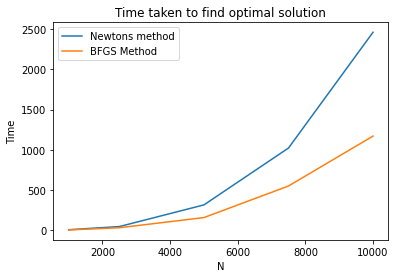

In [ ]:
import matplotlib.pyplot as plt
plt.plot(n_values,time_taken_newtons ,label='Newtons method')
plt.plot(n_values,time_taken_bfgs ,label='BFGS Method')
plt.title('Time taken to find optimal solution')
plt.xlabel('N')
plt.ylabel('Time')
plt.legend()
plt.show()

Clearly, the time taken by Newton's method is higher as compared to that of BFGS method. So, we can say that BFGS is a better algorith to find minimum.